In [2]:
import pandas as pd
import cv2
import json
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_excel(r'train\train.xlsx')
train_df.head()

,Unnamed: 0,ID,image_path,annotation_path_label,pathology
0,0,image_393.jpg,train\images\image_393.jpg,train\annotation\annotation_393.json,1
1,1,image_326.jpg,train\images\image_326.jpg,train\annotation\annotation_326.json,1
2,2,image_290.jpg,train\images\image_290.jpg,train\annotation\annotation_290.json,1
3,3,image_206.jpg,train\images\image_206.jpg,train\annotation\annotation_206.json,1
4,4,image_429.jpg,train\images\image_429.jpg,train\annotation\annotation_429.json,0


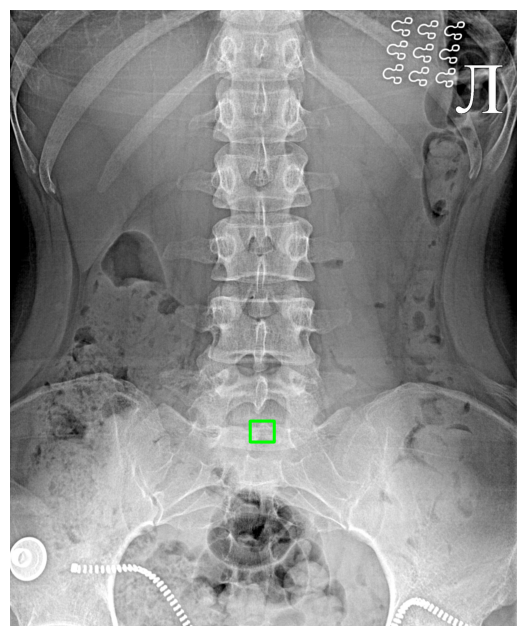

In [4]:
# Загрузка изображения и JSON
image_path = train_df['image_path'][15]
json_path = train_df['annotation_path_label'][15]

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Конвертация в RGB для корректного отображения
with open(json_path, 'r') as f:
    data = json.load(f)

# Извлечение координат bbox
bbox = data['annotations'][0]['bbox']
x, y, w, h = map(int, bbox)

# Рисование прямоугольника
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 10)

# Отображение с помощью matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()